[Reference](https://python.plainenglish.io/mastering-data-analysis-10-python-libraries-every-analyst-must-know-83bd8bec47db)

# 1. Pandas

In [1]:
import pandas as pd
import numpy as np

# 1. Create dummy messy data
data = {
    'DATE_COL': ['2024-01-01', '2024-01-01', '2024-01-02', None],
    'Cust_ID': [101, 101, 102, 103],
    'Sales Amount': ['$500', '$500', '$750', 'Unknown']
}
df = pd.DataFrame(data)

# 2. The Clean-Up Process
# Drop duplicates
df = df.drop_duplicates()

# Rename columns to standard lowercase format
df = df.rename(columns={'DATE_COL': 'date', 'Cust_ID': 'customer_id', 'Sales Amount': 'sales'})

# Handle missing values (fill NaN dates with a default or drop)
df['date'] = df['date'].fillna('2024-01-01')

# Fix data types: Remove '$' and convert 'Unknown' to NaN, then to float
df['sales'] = pd.to_numeric(df['sales'].astype(str).str.replace('$', '', regex=False), errors='coerce')

# Fill missing sales numbers with the average (imputation)
df['sales'] = df['sales'].fillna(df['sales'].mean())

print("Cleaned Dataframe:")
print(df)

Cleaned Dataframe:
         date  customer_id  sales
0  2024-01-01          101  500.0
2  2024-01-02          102  750.0
3  2024-01-01          103  625.0


# 2. NumPy

In [2]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Scenario: We want to compare two website versions (A and B).
# We simulate 1,000 users for each version.

# Version A: Average conversion rate 10%, standard deviation 2%
group_a = np.random.normal(loc=0.10, scale=0.02, size=1000)

# Version B: Average conversion rate 12%, standard deviation 2%
group_b = np.random.normal(loc=0.12, scale=0.02, size=1000)

# Calculate the difference in means
diff = group_b.mean() - group_a.mean()

print(f"Group A Mean Conversion: {group_a.mean():.2%}")
print(f"Group B Mean Conversion: {group_b.mean():.2%}")
print(f"Observed Lift: {diff:.2%}")

# Logic check: How often is B actually better than A in our simulation?
better_count = np.sum(group_b > group_a)
print(f"Probability B is better than A (per user simulation): {better_count / 1000:.1%}")

Group A Mean Conversion: 10.04%
Group B Mean Conversion: 12.14%
Observed Lift: 2.10%
Probability B is better than A (per user simulation): 75.8%


# 3. Matplotlib

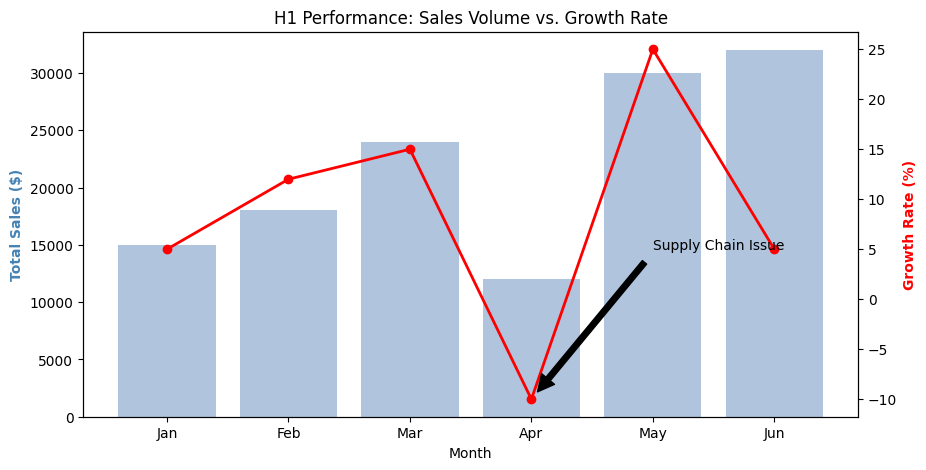

In [3]:
import matplotlib.pyplot as plt

# Dummy Data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
sales = [15000, 18000, 24000, 12000, 30000, 32000] # Primary Axis
growth = [5, 12, 15, -10, 25, 5]                  # Secondary Axis (%)

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot 1: Bar Chart for Sales (Left Axis)
ax1.bar(months, sales, color='#B0C4DE', label='Sales ($)')
ax1.set_ylabel('Total Sales ($)', color='#4682B4', fontweight='bold')
ax1.set_xlabel('Month')

# Create a twin axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot 2: Line Chart for Growth (Right Axis)
ax2.plot(months, growth, color='red', marker='o', linewidth=2, label='Growth %')
ax2.set_ylabel('Growth Rate (%)', color='red', fontweight='bold')

# Add a custom annotation pointing to the dip
plt.annotate('Supply Chain Issue', xy=(3, -10), xytext=(4, 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('H1 Performance: Sales Volume vs. Growth Rate')
plt.show()

# 4. Seaborn


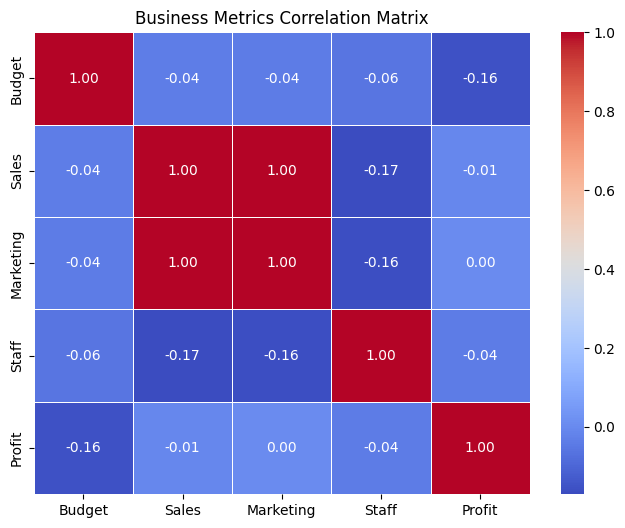

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate dummy data: 5 variables, 100 rows
np.random.seed(10)
data = pd.DataFrame(np.random.rand(100, 5), columns=['Budget', 'Sales', 'Marketing', 'Staff', 'Profit'])

# Artificially create a strong correlation between Marketing and Sales
data['Sales'] = data['Marketing'] * 3 + np.random.normal(0, 0.1, 100)

# Calculate correlation matrix
corr_matrix = data.corr()

# Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,       # Show the numbers in the boxes
            cmap='coolwarm',  # Color scheme
            fmt=".2f",        # Decimal precision
            linewidths=0.5)

plt.title('Business Metrics Correlation Matrix')
plt.show()

# 5. Plotly

In [5]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Generate dummy financial time-series data
dates = pd.date_range(start='2024-01-01', periods=60, freq='D')
open_data = np.linspace(100, 200, 60) + np.random.normal(0, 5, 60)
high_data = open_data + np.random.rand(60) * 10
low_data = open_data - np.random.rand(60) * 10
close_data = open_data + np.random.normal(0, 5, 60)

# Create the interactive Candlestick chart
fig = go.Figure(data=[go.Candlestick(x=dates,
                open=open_data,
                high=high_data,
                low=low_data,
                close=close_data)])

# Add a range slider to zoom in on specific weeks
fig.update_layout(
    title='Q1 Stock Price Movement (Interactive)',
    xaxis_title='Date',
    yaxis_title='Price ($)',
    xaxis_rangeslider_visible=True
)

fig.show()

# 6. Scikit-learn: Machine Learning for Analysts

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Simple data: Years of experience vs Salary
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([40000, 45000, 50000, 56000, 62000])

model = LinearRegression()
model.fit(X, y)

# Predict salary for 6 years of experience
prediction = model.predict([[6]])
print(f"Predicted Salary: ${prediction[0]:.2f}")

Predicted Salary: $67100.00


# 7. Statsmodels

In [7]:
import statsmodels.api as sm
import numpy as np

# Generate fake data
X = np.random.rand(100)
y = 2 * X + np.random.normal(0, 0.1, 100)

# Add a constant (intercept) to the model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary()) # Outputs the full statistical table

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3769.
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           5.00e-80
Time:                        12:39:54   Log-Likelihood:                 97.157
No. Observations:                 100   AIC:                            -190.3
Df Residuals:                      98   BIC:                            -185.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0157      0.017     -0.896      0.3

# 8. Openpyxl-Your Automation Partner

In [8]:
from openpyxl import Workbook

wb = Workbook()
ws = wb.active

# Write data
ws['A1'] = "Category"
ws['B1'] = "Value"
ws['A2'] = "Marketing"
ws['B2'] = 5000

# Save the file
wb.save("report.xlsx")

# 9. Beautiful Soup — Your Data Hunter

In [9]:
import requests
from bs4 import BeautifulSoup

# Get the HTML
page = requests.get("https://example.com")
soup = BeautifulSoup(page.content, "html.parser")

# Find the first header (h1)
header = soup.find("h1").text
print(f"Page Title: {header}")

Page Title: Example Domain


# 10. Polars

In [10]:
import polars as pl

# Polars uses 'scan_csv' for lazy loading (super fast)
df = pl.scan_csv("massive_file.csv")

# Chain operations efficiently
result = (
    df.filter(pl.col("sales") > 100)
    .group_by("category")
    .agg(pl.col("sales").sum())
    .collect() # Execute the query
)

print(result)